In [1]:
import sys
sys.path.insert(0, '../modules')
get_ipython().magic(u'run visualizations.ipynb')
from hits import CyDetHits, CTHHits, CDCHits

Populating the interactive namespace from numpy and matplotlib


In [2]:
import root_numpy

# Import Data

In [3]:
from root_numpy import root2array
from root_numpy import list_trees

In [4]:
file_base = "/vols/build/comet/users/elg112/ICEDUST"\
            "/local_storage/Blessed_Outputs/"
cdc_sig_file = file_base + "250k_combined_signal_batch_1.root"
cth_sig_file = cdc_sig_file

In [5]:
file_base = "/home/elg112/ICEDUST_old/track_finding_standalone/"\
            "track_finding_yandex/data/"
cdc_sig_file = file_base + "after_sum_hit_cth.root"
cth_sig_file = cdc_sig_file

In [6]:
list_trees(cdc_sig_file)

['CTHHitTree', 'CDCHitTree', 'COMETEvents']

In [7]:
event_max = 50000

In [8]:
ice_sample = root2array(cdc_sig_file, treename="CTHHitTree", stop=event_max)

In [9]:
for name in ice_sample.dtype.names:
    print name

CTHHit.fModule
CTHHit.fCounter
CTHHit.fIsSc
CTHHit.fIsLG
CTHHit.fNContrib
CTHHit.fTrack.fTrackID
CTHHit.fTrack.fParentTrackID
CTHHit.fTrack.fPID
CTHHit.fTrack.fTags.fTagMaskPersisted
CTHHit.fTrack.fTagsAsParent.fTagMaskPersisted
CTHHit.fTrack.fTagsAsDaughter.fTagMaskPersisted
CTHHit.fTrack.fStartMomentum.fX
CTHHit.fTrack.fStartMomentum.fY
CTHHit.fTrack.fStartMomentum.fZ
CTHHit.fTrack.fStopMomentum.fX
CTHHit.fTrack.fStopMomentum.fY
CTHHit.fTrack.fStopMomentum.fZ
CTHHit.fTrack.fStartPosGlobal.fP.fX
CTHHit.fTrack.fStartPosGlobal.fP.fY
CTHHit.fTrack.fStartPosGlobal.fP.fZ
CTHHit.fTrack.fStartPosGlobal.fE
CTHHit.fTrack.fStopPosGlobal.fP.fX
CTHHit.fTrack.fStopPosGlobal.fP.fY
CTHHit.fTrack.fStopPosGlobal.fP.fZ
CTHHit.fTrack.fStopPosGlobal.fE
CTHHit.fMCPos.fP.fX
CTHHit.fMCPos.fP.fY
CTHHit.fMCPos.fP.fZ
CTHHit.fMCPos.fE
CTHHit.fCharge
CTHHit.fChannel
CTHHit.fEventNumber
CTHHit.fHitNumber
CTHHit.fIsSig


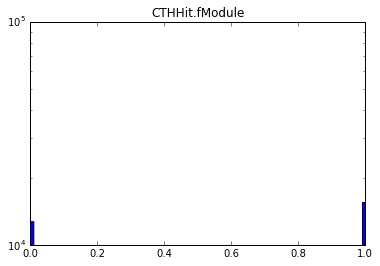

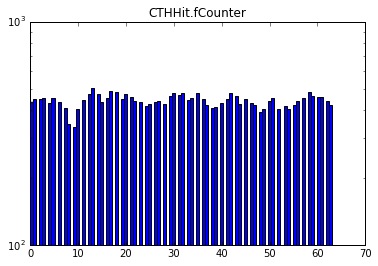

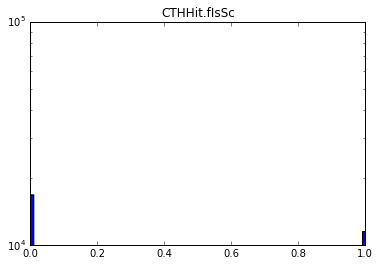

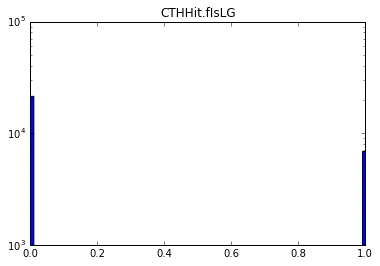

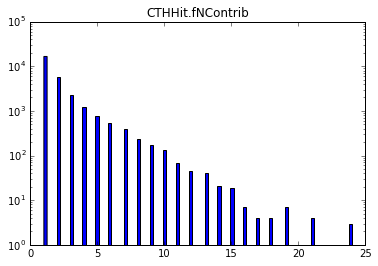

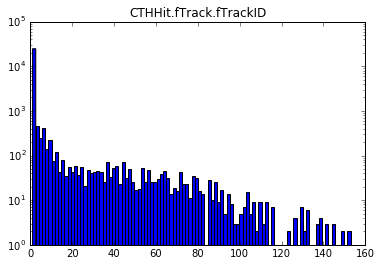

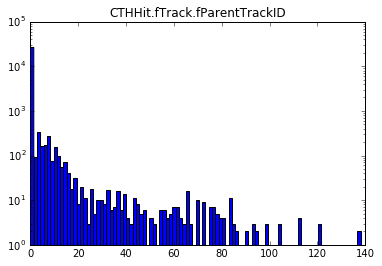

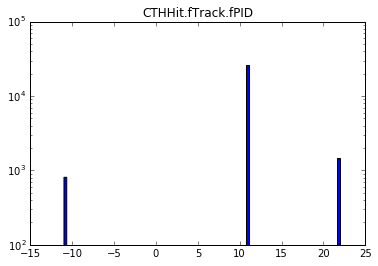

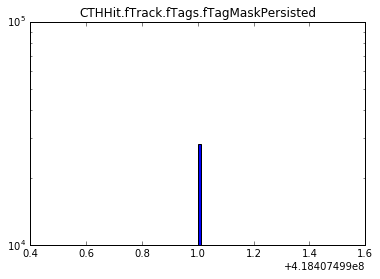

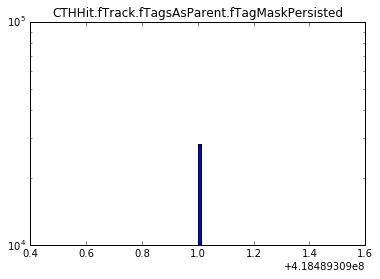

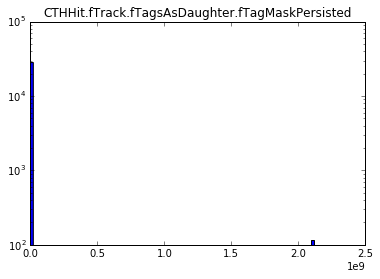

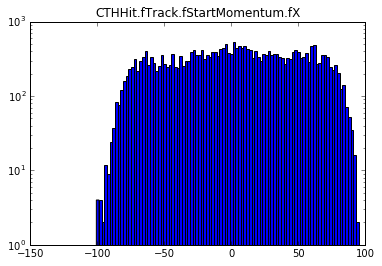

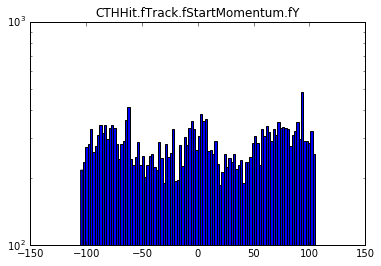

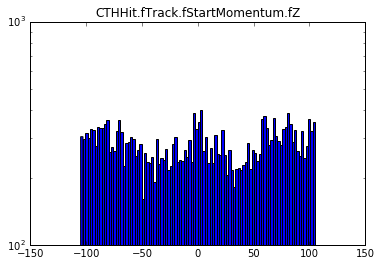

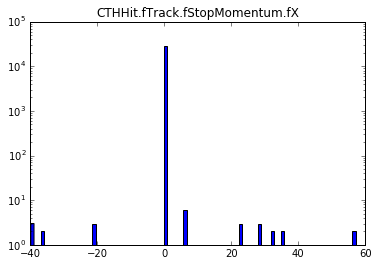

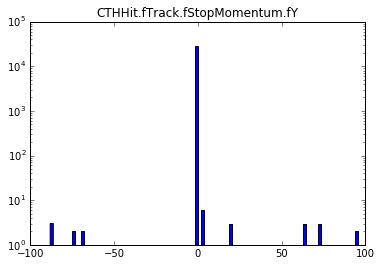

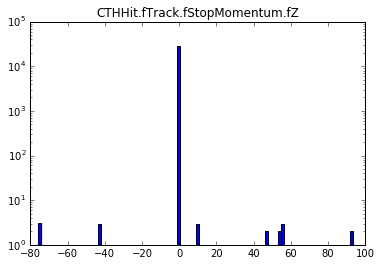

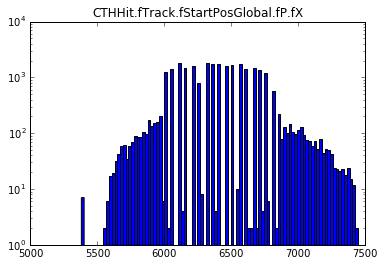

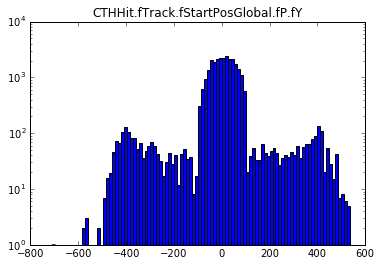

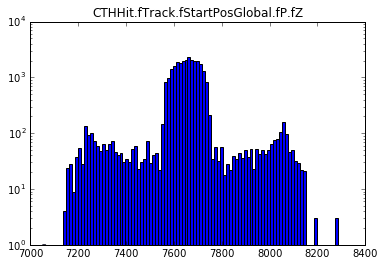

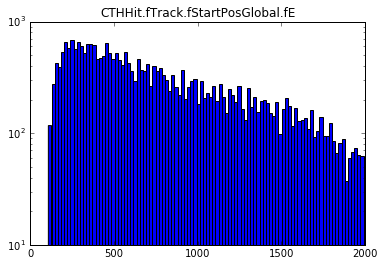

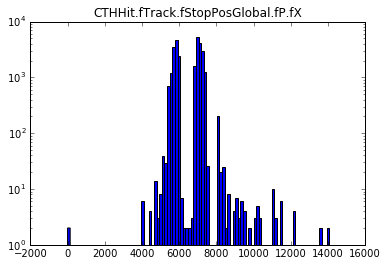

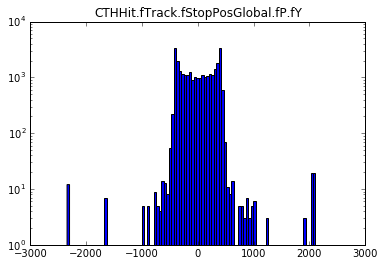

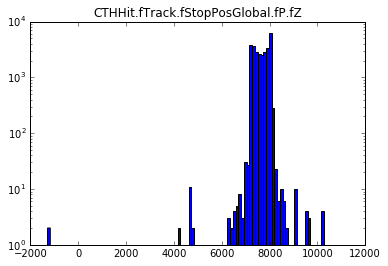

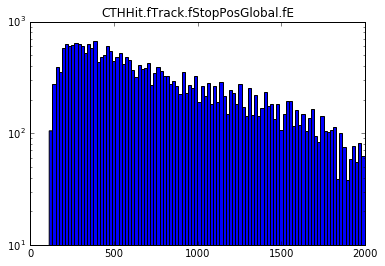

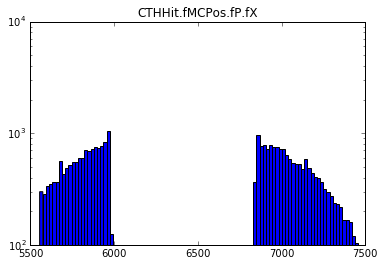

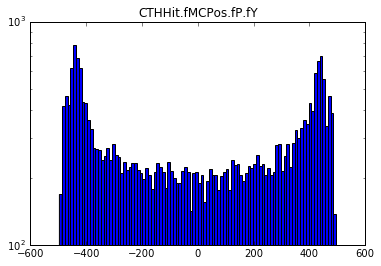

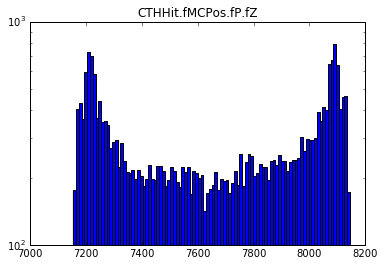

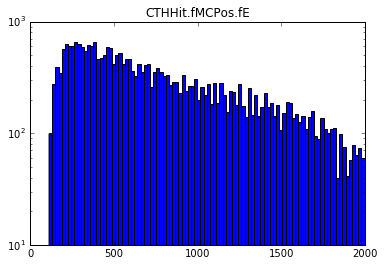

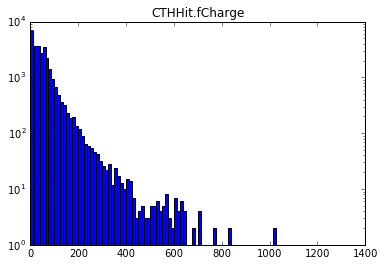

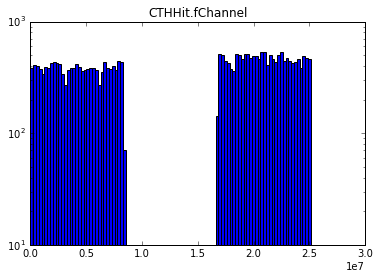

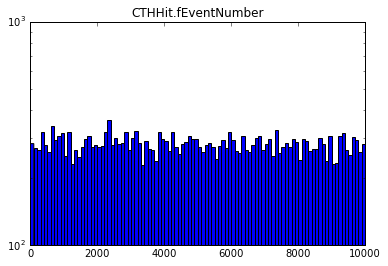

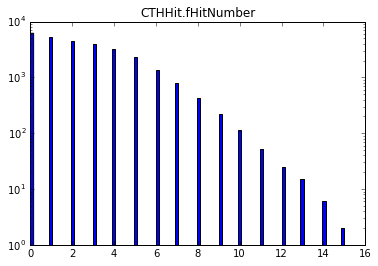

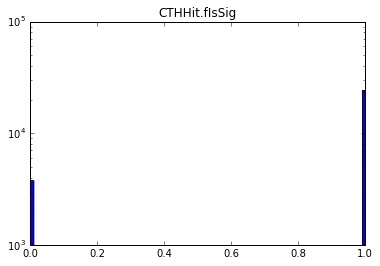

In [10]:
for name in ice_sample.dtype.names:
    plt.title(name)
    plt.hist(ice_sample[name], bins=100, log=True)
    show()

In [11]:
del ice_sample

In [12]:
import hits

In [13]:
reload(hits)

<module 'hits' from '../modules/hits.pyc'>

In [14]:
from hits import FlatHits

In [15]:
this_select = "CTHHit.fEventNumber < {}".format(event_max)

In [16]:
these_branches = root_numpy.list_branches(cth_sig_file, treename="CTHHitTree")
good_branches = these_branches[:-3]+ [these_branches[-2]]

In [17]:
ice_flat = FlatHits(path=cth_sig_file, 
                    tree="CTHHitTree", 
                    prefix="CTHHit.f", 
                    key_name="EventNumber",
                    hit_type_name="IsSig",
                    signal_coding=[0],
                    branches=good_branches,
                    use_evt_idx=True,
                    selection=this_select)

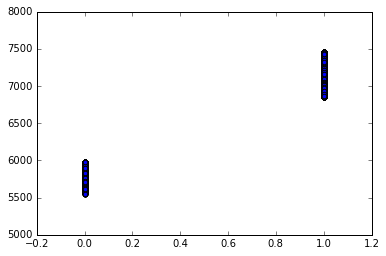

In [18]:
plt.scatter(ice_flat.get_events()["CTHHit.fModule"], ice_flat.get_events()["CTHHit.fMCPos.fP.fX"])

In [19]:
from collections import Counter
from pprint import pprint

In [20]:
channel_hit_counter = Counter(ice_flat.get_events()["CTHHit.fChannel"])

In [21]:
pprint(dict(channel_hit_counter))

{0: 98,
 32768: 19,
 65536: 60,
 98304: 12,
 131072: 92,
 163840: 17,
 196608: 70,
 229376: 13,
 262144: 99,
 294912: 21,
 327680: 63,
 360448: 20,
 393216: 100,
 425984: 25,
 458752: 69,
 491520: 12,
 524288: 101,
 557056: 18,
 589824: 61,
 622592: 9,
 655360: 99,
 688128: 20,
 720896: 75,
 753664: 17,
 786432: 99,
 819200: 22,
 851968: 66,
 884736: 13,
 917504: 93,
 950272: 16,
 983040: 70,
 1015808: 12,
 1048576: 85,
 1081344: 16,
 1114112: 62,
 1146880: 9,
 1179648: 74,
 1212416: 16,
 1245184: 63,
 1277952: 5,
 1310720: 90,
 1343488: 15,
 1376256: 66,
 1409024: 13,
 1441792: 107,
 1474560: 19,
 1507328: 73,
 1540096: 10,
 1572864: 111,
 1605632: 20,
 1638400: 86,
 1671168: 8,
 1703936: 119,
 1736704: 27,
 1769472: 78,
 1802240: 13,
 1835008: 118,
 1867776: 13,
 1900544: 76,
 1933312: 9,
 1966080: 103,
 1998848: 13,
 2031616: 69,
 2064384: 12,
 2097152: 109,
 2129920: 19,
 2162688: 77,
 2195456: 11,
 2228224: 115,
 2260992: 19,
 2293760: 85,
 2326528: 15,
 2359296: 105,
 2392064: 17

In [22]:

print len(channel_hit_counter)

512


In [23]:
def used_bits(channel):
    return "{0:025b}".format(channel)[:10]

In [24]:
def get_channel(channel):
    trimmed_channel = int("{0:025b}".format(channel)[:10],2)
    isScMask = 1 << 1
    isLGMask = 1 << 0
    if not (trimmed_channel & isScMask):
        return 0
    elif not (trimmed_channel & isLGMask):
        return 1
    else:
        return 2

In [25]:
def get_pos(channel):
    trimmed_channel = int("{0:025b}".format(channel)[:10],2)
    isDownstream = 1 << 9
    return trimmed_channel & isDownstream

In [26]:
mapping = zip(ice_flat.get_events()["CTHHit.fChannel"], 
               ice_flat.get_events()["CTHHit.fIsSc"], 
               ice_flat.get_events()["CTHHit.fIsLG"],
                ice_flat.get_events()["CTHHit.fModule"])
dict_map = {d[0]:d[1:] for d in mapping}

In [27]:
for key in sort(channel_hit_counter.keys())[1:]:
    print key, int("{0:025b}".format(key)[:10],2), get_channel(key), used_bits(key), dict_map[key], get_pos(key)

32768 1 0 0000000001 (False, True, 0) 0
65536 2 1 0000000010 (True, False, 0) 0
98304 3 2 0000000011 (True, True, 0) 0
131072 4 0 0000000100 (False, False, 0) 0
163840 5 0 0000000101 (False, True, 0) 0
196608 6 1 0000000110 (True, False, 0) 0
229376 7 2 0000000111 (True, True, 0) 0
262144 8 0 0000001000 (False, False, 0) 0
294912 9 0 0000001001 (False, True, 0) 0
327680 10 1 0000001010 (True, False, 0) 0
360448 11 2 0000001011 (True, True, 0) 0
393216 12 0 0000001100 (False, False, 0) 0
425984 13 0 0000001101 (False, True, 0) 0
458752 14 1 0000001110 (True, False, 0) 0
491520 15 2 0000001111 (True, True, 0) 0
524288 16 0 0000010000 (False, False, 0) 0
557056 17 0 0000010001 (False, True, 0) 0
589824 18 1 0000010010 (True, False, 0) 0
622592 19 2 0000010011 (True, True, 0) 0
655360 20 0 0000010100 (False, False, 0) 0
688128 21 0 0000010101 (False, True, 0) 0
720896 22 1 0000010110 (True, False, 0) 0
753664 23 2 0000010111 (True, True, 0) 0
786432 24 0 0000011000 (False, False, 0) 0
8192

In [28]:
def trim_cth_track(cth_samp):    
    # First reduce each CTH hit to the earliest signal hit in that track
    hits_to_keep = []
    for evt in range(cth_samp.n_events):
        sig_hits = cth_samp.get_signal_hits(evt)
        for track in np.unique(sig_hits["CTHHit.fTrack.fTrackID"]):
            track_hits = cth_samp.filter_hits(sig_hits, "CTHHit.fTrack.fTrackID", values=track)
            min_time = np.amin(track_hits["CTHHit.fMCPos.fE"])
            earliest_hit = track_hits[cth_samp.hits_index_name][track_hits["CTHHit.fMCPos.fE"] == min_time][0]
            #if earliest_hit != track_hits[cth_samp.hits_index_name][0]:
            #    print "time error"
            #    break
            #hits_to_keep.append(cth_samp.filter_hits(sig_hits, "CTHHit.fTrackID", values=track)[cth_samp.hits_index_name][0])
            hits_to_keep.append(earliest_hit)
            
    print "Before earliest track cut " + str(cth_samp.n_hits)
    cth_samp.trim_hits(cth_samp.hits_index_name, values=hits_to_keep)
    print "After earliest track cut " + str(cth_samp.n_hits)

In [29]:
print ice_flat.all_branches
print ice_flat.n_events
print ice_flat.n_hits
print ice_flat.event_to_n_hits
print ice_flat.hits_to_events
print ice_flat.event_to_hits

['CTHHit.fModule', 'CTHHit.fCounter', 'CTHHit.fIsSc', 'CTHHit.fIsLG', 'CTHHit.fNContrib', 'CTHHit.fTrack.fTrackID', 'CTHHit.fTrack.fParentTrackID', 'CTHHit.fTrack.fPID', 'CTHHit.fTrack.fTags.fTagMaskPersisted', 'CTHHit.fTrack.fTagsAsParent.fTagMaskPersisted', 'CTHHit.fTrack.fTagsAsDaughter.fTagMaskPersisted', 'CTHHit.fTrack.fStartMomentum.fX', 'CTHHit.fTrack.fStartMomentum.fY', 'CTHHit.fTrack.fStartMomentum.fZ', 'CTHHit.fTrack.fStopMomentum.fX', 'CTHHit.fTrack.fStopMomentum.fY', 'CTHHit.fTrack.fStopMomentum.fZ', 'CTHHit.fTrack.fStartPosGlobal.fP.fX', 'CTHHit.fTrack.fStartPosGlobal.fP.fY', 'CTHHit.fTrack.fStartPosGlobal.fP.fZ', 'CTHHit.fTrack.fStartPosGlobal.fE', 'CTHHit.fTrack.fStopPosGlobal.fP.fX', 'CTHHit.fTrack.fStopPosGlobal.fP.fY', 'CTHHit.fTrack.fStopPosGlobal.fP.fZ', 'CTHHit.fTrack.fStopPosGlobal.fE', 'CTHHit.fMCPos.fP.fX', 'CTHHit.fMCPos.fP.fY', 'CTHHit.fMCPos.fP.fZ', 'CTHHit.fMCPos.fE', 'CTHHit.fCharge', 'CTHHit.fChannel', 'CTHHit.fHitNumber', 'CTHHit.fIsSig', 'CTHHit.fEventNu

In [30]:
import pandas

In [31]:
iced_df = pandas.DataFrame(ice_flat.data)
iced_df[iced_df["CTHHit.fNContrib"] != 0]

,CTHHit.fModule,CTHHit.fCounter,CTHHit.fIsSc,CTHHit.fIsLG,CTHHit.fNContrib,CTHHit.fTrack.fTrackID,CTHHit.fTrack.fParentTrackID,CTHHit.fTrack.fPID,CTHHit.fTrack.fTags.fTagMaskPersisted,CTHHit.fTrack.fTagsAsParent.fTagMaskPersisted,...,CTHHit.fMCPos.fP.fY,CTHHit.fMCPos.fP.fZ,CTHHit.fMCPos.fE,CTHHit.fCharge,CTHHit.fChannel,CTHHit.fHitNumber,CTHHit.fIsSig,CTHHit.fEventNumber,CTHHit.fhits_index,CTHHit.fevent_index
0,1,16,False,True,1,1,0,11,418407500,418489310,...,-435.062500,7710.941650,364.859787,6.489363,18907136,0,True,2,0,0
1,0,13,False,False,3,1,0,11,418407500,418489310,...,-442.270462,7754.210449,384.569778,9.729466,1703936,0,True,3,1,1
2,0,16,False,False,3,1,0,11,418407500,418489310,...,-457.406860,7598.742676,384.267380,36.061236,2097152,1,True,3,2,1
3,0,17,False,False,5,1,0,11,418407500,418489310,...,-441.102859,7605.474121,384.206650,52.619449,2228224,2,True,3,3,1
4,1,56,False,False,1,1,0,11,418407500,418489310,...,334.461273,7332.423828,456.274734,1.546713,24117248,0,True,4,4,2
5,1,57,False,False,1,1,0,11,418407500,418489310,...,236.707062,7281.381348,455.886780,48.962128,24248320,1,True,4,5,2
6,1,58,False,False,3,1,0,11,418407500,418489310,...,231.951172,7263.190186,455.822403,53.928325,24379392,2,True,4,6,2
7,1,58,True,False,1,1,0,11,418407500,418489310,...,218.063225,7226.123779,455.686127,30.405581,24444928,3,True,4,7,2
8,1,59,False,False,2,1,0,11,418407500,418489310,...,226.461075,7246.821777,455.762802,62.758773,24510464,4,True,4,8,2
9,1,59,True,False,1,1,0,11,418407500,418489310,...,212.642288,7214.905029,455.643585,22.112780,24576000,5,True,4,9,2


In [32]:
del iced_df

IsSc [False]
IsLG [ True]
IsSig [ True]
Counter [16]
Module [1]
Number Signal : 1
Timing : 364.859786987 


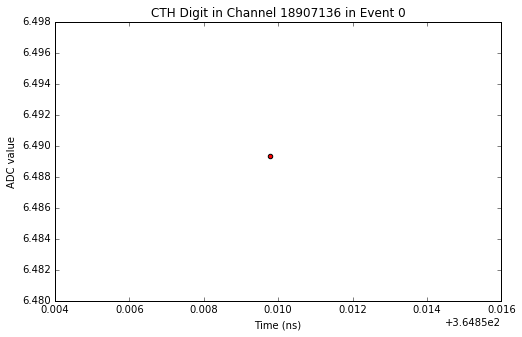

/home/elg112/development/miniconda2/envs/rep/lib/python2.7/site-packages/ipykernel/__main__.py:26: FutureWarning: elementwise != comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.


IsSc [False]
IsLG [False]
IsSig [ True]
Counter [13]
Module [0]
Number Signal : 1
Timing : 384.569778442 


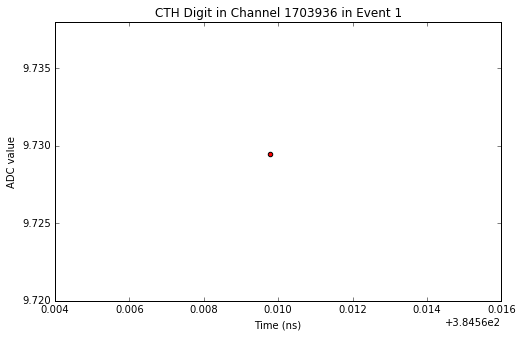

IsSc [False]
IsLG [False]
IsSig [ True]
Counter [16]
Module [0]
Number Signal : 1
Timing : 384.267379761 


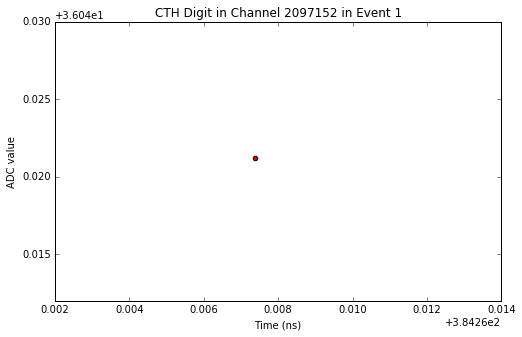

IsSc [False]
IsLG [False]
IsSig [ True]
Counter [17]
Module [0]
Number Signal : 1
Timing : 384.20664978 


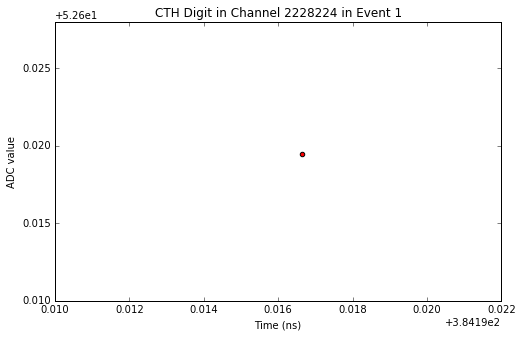

IsSc [False]
IsLG [False]
IsSig [ True]
Counter [56]
Module [1]
Number Signal : 1
Timing : 456.274734497 


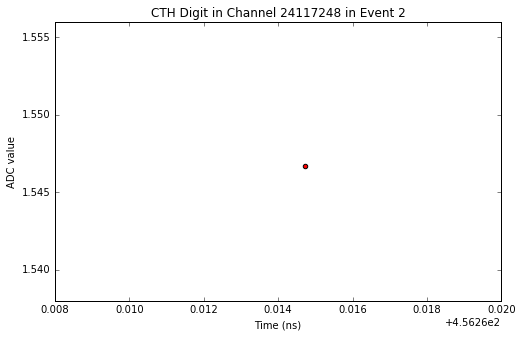

IsSc [False]
IsLG [False]
IsSig [ True]
Counter [57]
Module [1]
Number Signal : 1
Timing : 455.886779785 


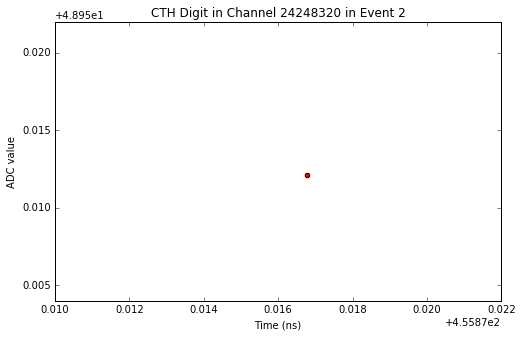

IsSc [False]
IsLG [False]
IsSig [ True]
Counter [58]
Module [1]
Number Signal : 1
Timing : 455.822402954 


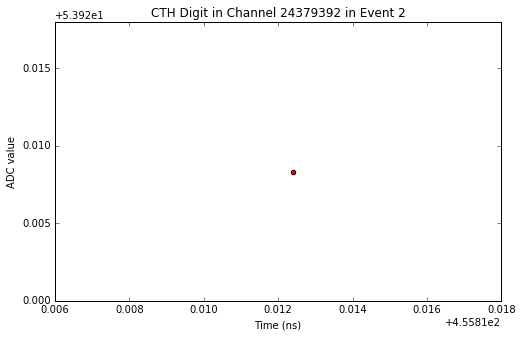

IsSc [ True]
IsLG [False]
IsSig [ True]
Counter [58]
Module [1]
Number Signal : 1
Timing : 455.686126709 


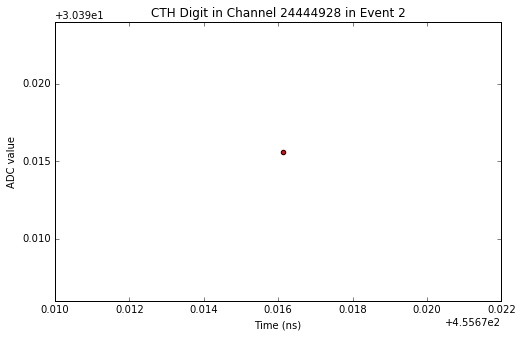

IsSc [False]
IsLG [False]
IsSig [ True]
Counter [59]
Module [1]
Number Signal : 1
Timing : 455.762802124 


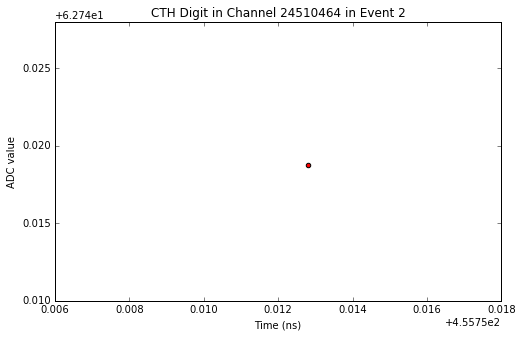

IsSc [ True]
IsLG [False]
IsSig [ True]
Counter [59]
Module [1]
Number Signal : 1
Timing : 455.643585205 


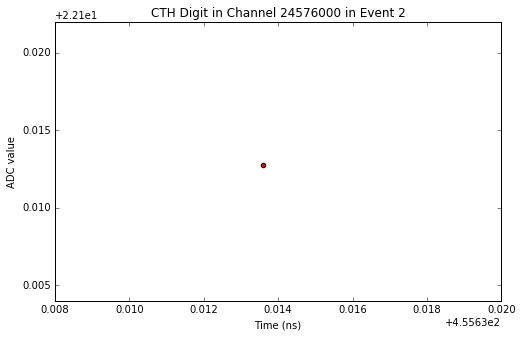

IsSc [ True]
IsLG [False]
IsSig [ True]
Counter [60]
Module [1]
Number Signal : 1
Timing : 455.587188721 


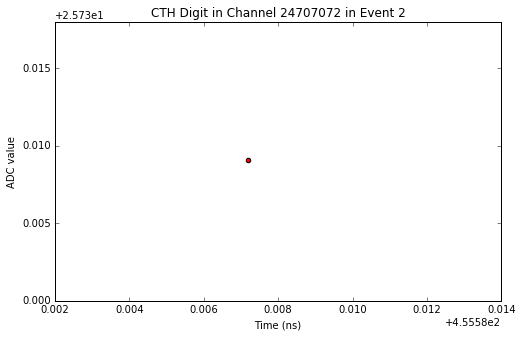

IsSc [ True]
IsLG [False]
IsSig [ True]
Counter [44]
Module [0]
Number Signal : 1
Timing : 1360.07104492 


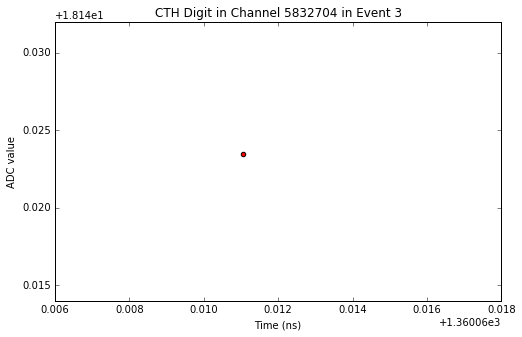

IsSc [False]
IsLG [False]
IsSig [ True]
Counter [45]
Module [0]
Number Signal : 1
Timing : 1360.22784424 


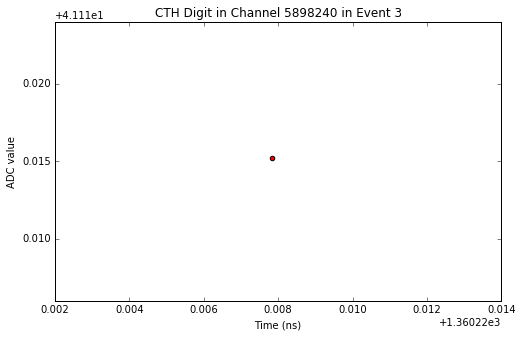

IsSc [ True]
IsLG [False]
IsSig [ True]
Counter [45]
Module [0]
Number Signal : 1
Timing : 1360.11224365 


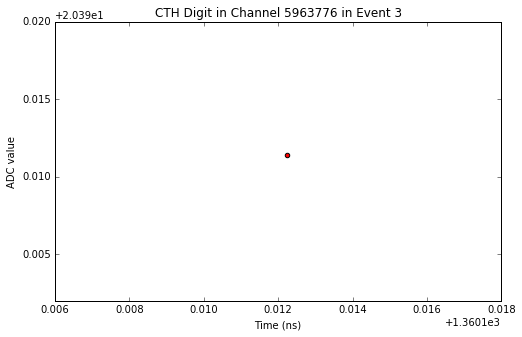

IsSc [False]
IsLG [False]
IsSig [ True]
Counter [46]
Module [0]
Number Signal : 1
Timing : 1360.27032471 


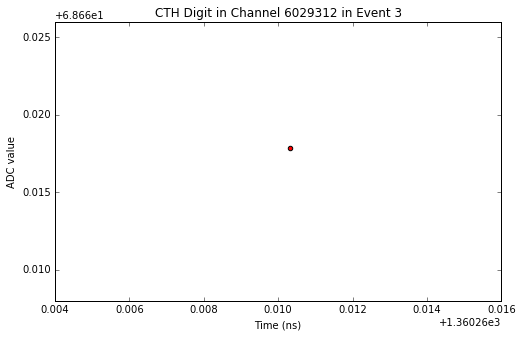

IsSc [False]
IsLG [False]
IsSig [ True]
Counter [39]
Module [1]
Number Signal : 1
Timing : 155.895484924 


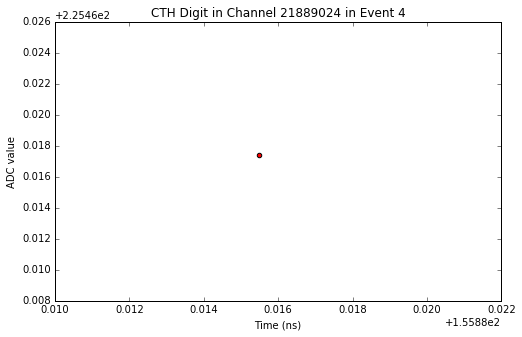

IsSc [ True]
IsLG [False]
IsSig [ True]
Counter [39]
Module [1]
Number Signal : 1
Timing : 155.776824951 


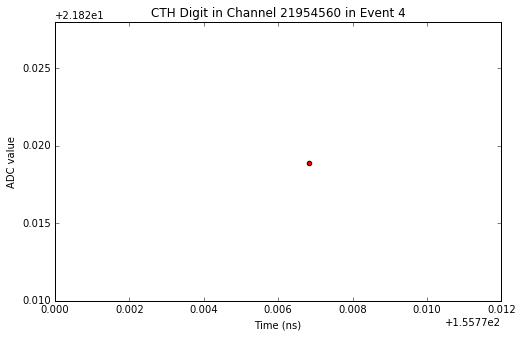

IsSc [False]
IsLG [False]
IsSig [ True]
Counter [40]
Module [1]
Number Signal : 1
Timing : 155.837127686 


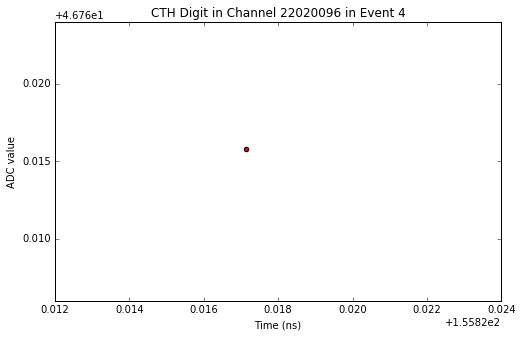

IsSc [ True]
IsLG [False]
IsSig [ True]
Counter [40]
Module [1]
Number Signal : 1
Timing : 155.738342285 


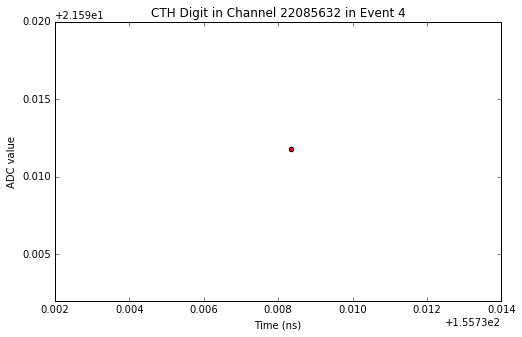

IsSc [False]
IsLG [False]
IsSig [ True]
Counter [31]
Module [1]
Number Signal : 1
Timing : 874.622802734 


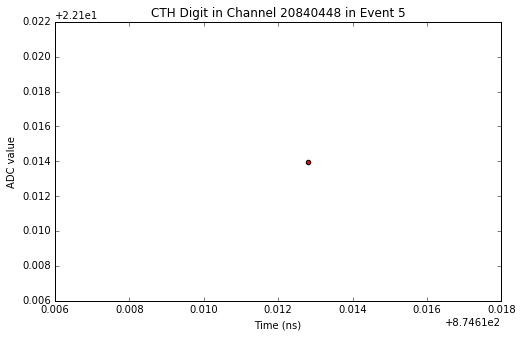

IsSc [ True]
IsLG [False]
IsSig [False]
Counter [0]
Module [1]
Number Signal : 0
Timing : nan 


/home/elg112/development/miniconda2/envs/rep/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


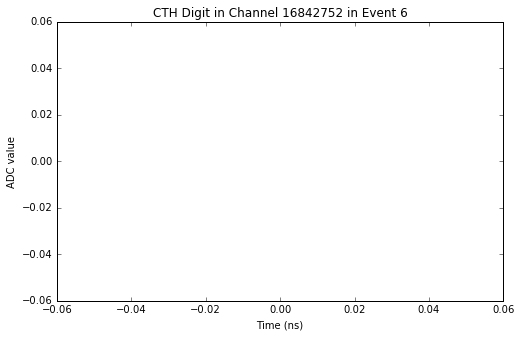

IsSc [False]
IsLG [False]
IsSig [False]
Counter [62]
Module [1]
Number Signal : 0
Timing : nan 


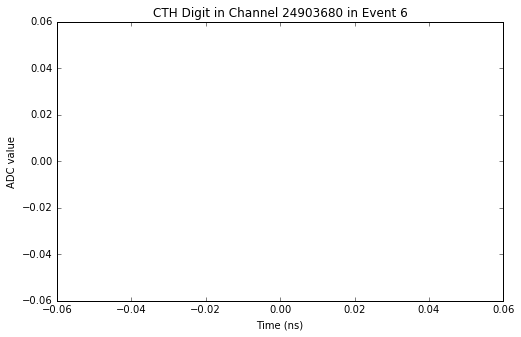

IsSc [ True]
IsLG [False]
IsSig [False]
Counter [62]
Module [1]
Number Signal : 0
Timing : nan 


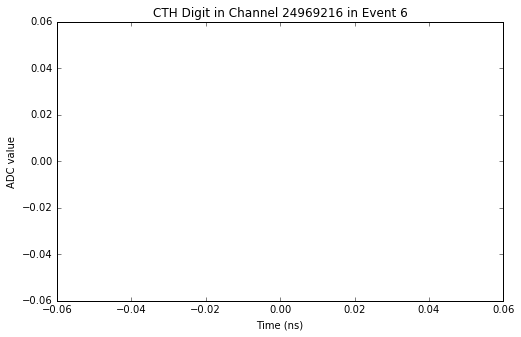

IsSc [ True]
IsLG [False]
IsSig [False]
Counter [16]
Module [0]
Number Signal : 0
Timing : nan 


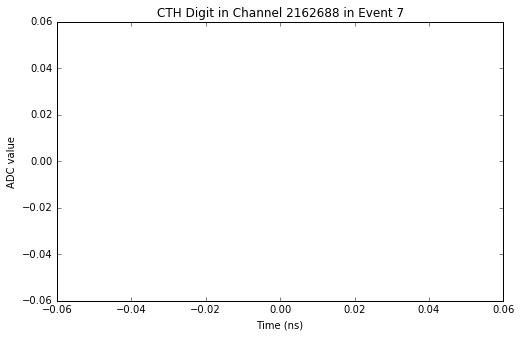

IsSc [False]
IsLG [False]
IsSig [False]
Counter [17]
Module [0]
Number Signal : 0
Timing : nan 


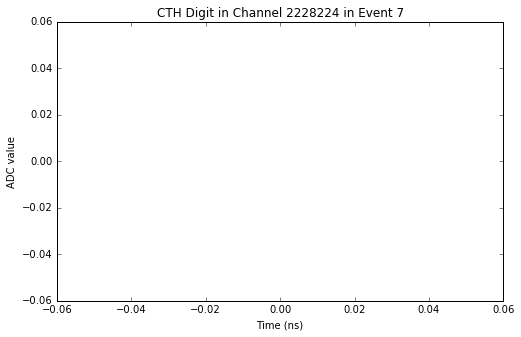

IsSc [ True]
IsLG [False]
IsSig [ True]
Counter [61]
Module [0]
Number Signal : 1
Timing : 518.210357666 


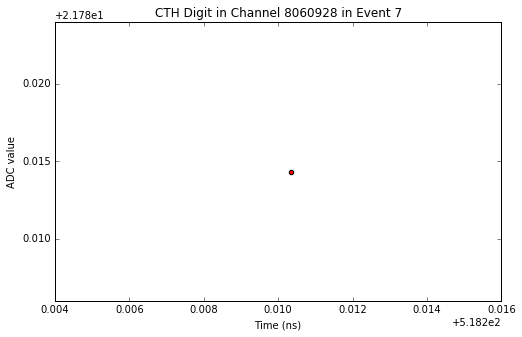

IsSc [False]
IsLG [False]
IsSig [ True]
Counter [62]
Module [0]
Number Signal : 1
Timing : 518.382781982 


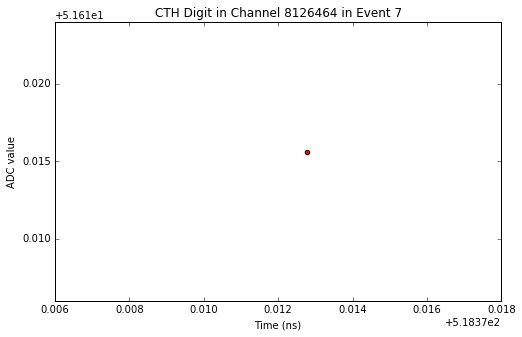

IsSc [ True]
IsLG [False]
IsSig [ True]
Counter [62]
Module [0]
Number Signal : 1
Timing : 518.256164551 


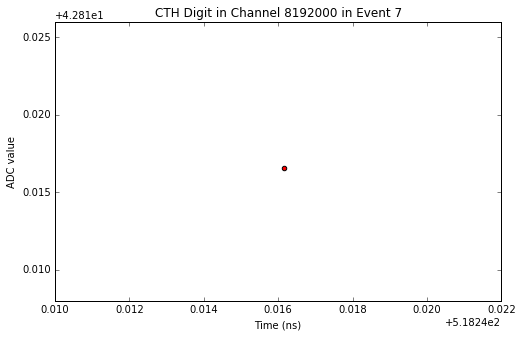

IsSc [False]
IsLG [False]
IsSig [ True]
Counter [63]
Module [0]
Number Signal : 1
Timing : 518.420562744 


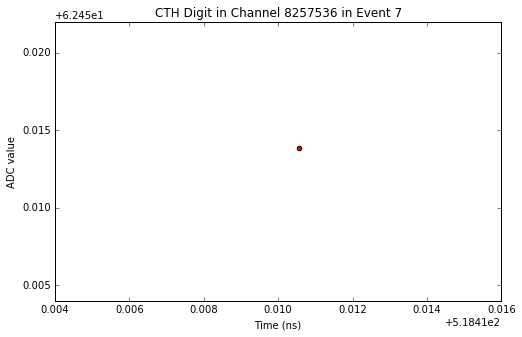

IsSc [False]
IsLG [False]
IsSig [ True]
Counter [28]
Module [1]
Number Signal : 1
Timing : 1029.69244385 


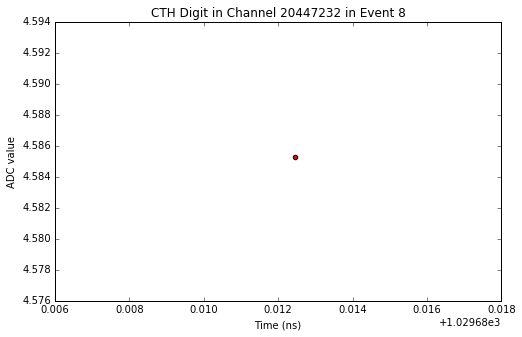

IsSc [ True]
IsLG [False]
IsSig [ True]
Counter [28]
Module [1]
Number Signal : 1
Timing : 1029.94232178 


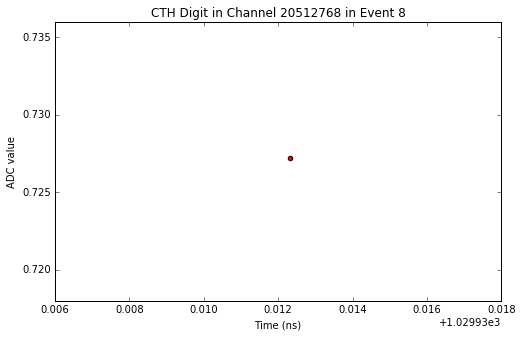

IsSc [False]
IsLG [ True]
IsSig [ True]
Counter [12]
Module [0]
Number Signal : 1
Timing : 476.417877197 


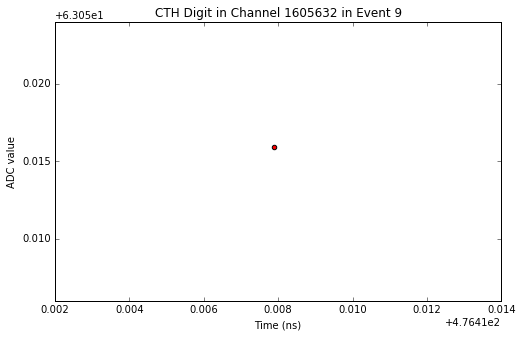

IsSc [False]
IsLG [False]
IsSig [ True]
Counter [24]
Module [0]
Number Signal : 1
Timing : 478.102935791 


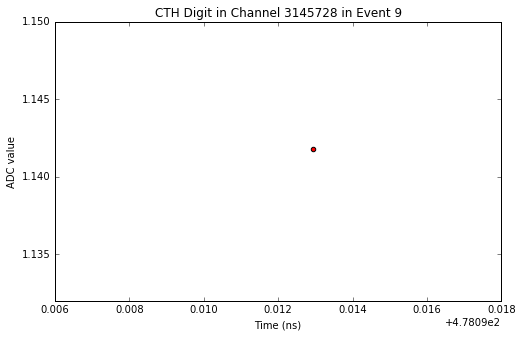

IsSc [ True]
IsLG [False]
IsSig [ True]
Counter [42]
Module [0]
Number Signal : 1
Timing : 470.256225586 


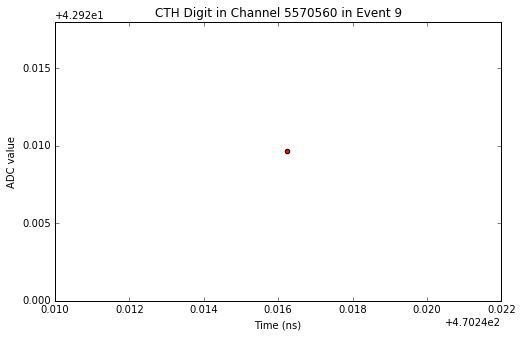

IsSc [ True]
IsLG [False]
IsSig [ True]
Counter [43]
Module [0]
Number Signal : 1
Timing : 470.200439453 


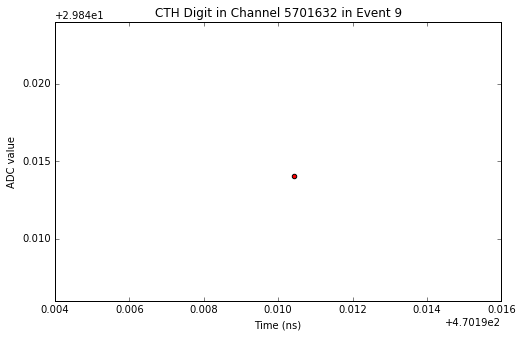

IsSc [False]
IsLG [False]
IsSig [ True]
Counter [57]
Module [0]
Number Signal : 1
Timing : 473.914703369 


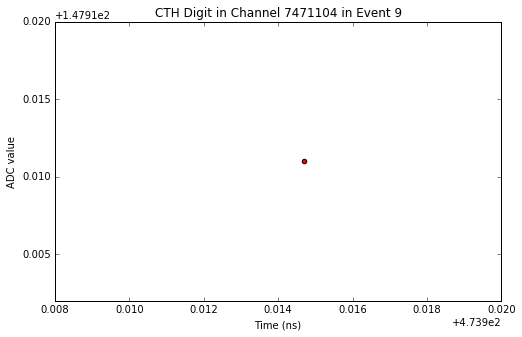

IsSc [ True]
IsLG [False]
IsSig [ True]
Counter [57]
Module [0]
Number Signal : 1
Timing : 473.820205688 


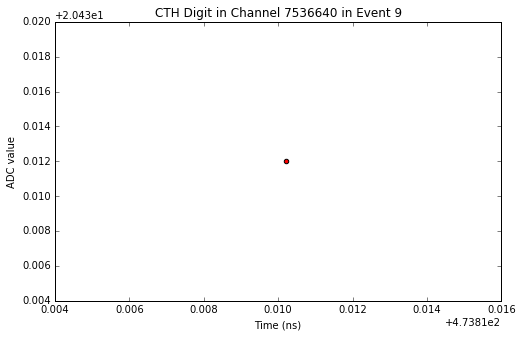

IsSc [False]
IsLG [False]
IsSig [ True]
Counter [58]
Module [0]
Number Signal : 1
Timing : 473.9868927 


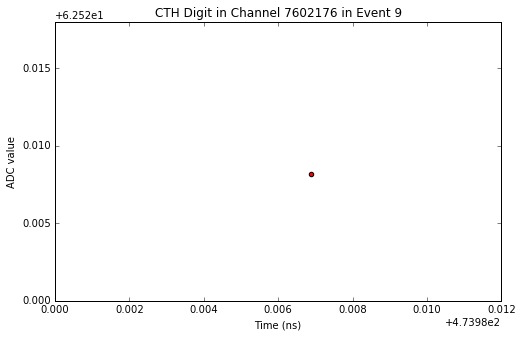

IsSc [ True]
IsLG [False]
IsSig [ True]
Counter [58]
Module [0]
Number Signal : 1
Timing : 473.861175537 


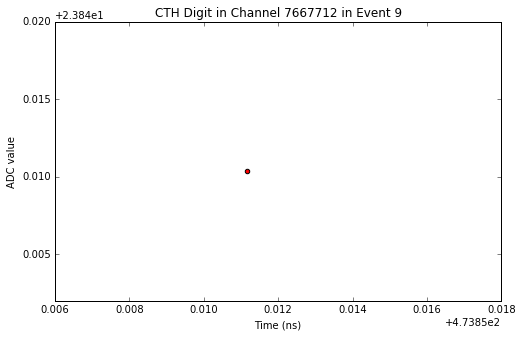

IsSc [False]
IsLG [False]
IsSig [ True]
Counter [59]
Module [0]
Number Signal : 1
Timing : 474.030090332 


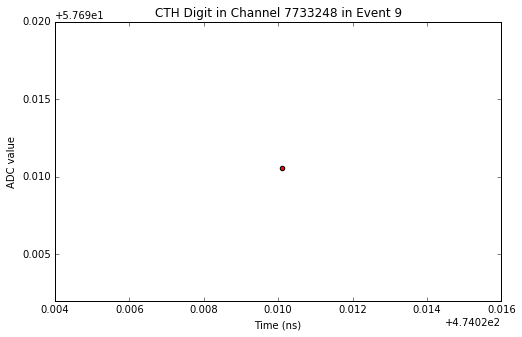

10
6178


In [33]:
# Look at the digits
sig_events = 0
chan_name = "CTHHit.fChannel"
figsize(8,5)
for event in np.unique(ice_flat.hits_to_events)[:10]:
    #print event
    event_hits = ice_flat.get_events(events=event)
    channels = np.unique(event_hits[chan_name])
    sig_event = False
    for chan in channels:
        chan_hits = ice_flat.filter_hits(event_hits, chan_name, values=chan)
        sig_hits = ice_flat.filter_hits(chan_hits, "CTHHit.fIsSig", values=1)
        #plt.scatter(chan_hits["CTHHit.fMCPos.fE"],chan_hits["CTHHit.fCharge"])
        plt.scatter(sig_hits["CTHHit.fMCPos.fE"],sig_hits["CTHHit.fCharge"], c='r')
        plt.xlabel("Time (ns)")
        plt.ylabel("ADC value")
        plt.title("CTH Digit in Channel {} in Event {}".format(chan, event))
        print "IsSc {}".format(np.unique(chan_hits["CTHHit.fIsSc"]))
        print "IsLG {}".format(np.unique(chan_hits["CTHHit.fIsLG"]))
        print "IsSig {}".format(np.unique(chan_hits["CTHHit.fIsSig"]))
        print "Counter {}".format(np.unique(chan_hits["CTHHit.fCounter"]))
        print "Module {}".format(np.unique(chan_hits["CTHHit.fModule"]))
        print "Number Signal : {}".format(len(sig_hits))
        print "Timing : {} ".format(np.average(sig_hits["CTHHit.fMCPos.fE"]))
        plt.show()
        if sig_hits != 0:
            sig_event = True
    sig_events += sig_event
print sig_events
print ice_flat.n_events

In [34]:
# Look at the digits
chan_name = "CTHHit.fChannel"
max_charge = []
min_time = []
max_time = []
min_peak_time = []

for event in np.unique(ice_flat.hits_to_events)[:]:
    event_hits = ice_flat.get_events(events=event)
    #event_hits = ice_flat.filter_hits(event_hits, "CTHHit.fIsSc", values=[True])
    event_hits = ice_flat.filter_hits(event_hits, "CTHHit.fIsSig", values=[True])
    if len(event_hits) != 0:
        max_charge.append(np.amax(event_hits["CTHHit.fCharge"]))
        min_time.append(np.amin(event_hits["CTHHit.fMCPos.fE"]))
        max_time.append(np.amax(event_hits["CTHHit.fMCPos.fE"]))
        t_hit = 1000000000
        for channel in np.unique(event_hits["CTHHit.fChannel"]):
            chan_hits = ice_flat.filter_hits(event_hits, "CTHHit.fChannel", values=channel)
            t_hit_here = ice_flat.filter_hits(chan_hits, "CTHHit.fCharge", 
                                             values=np.amax(chan_hits["CTHHit.fCharge"]))["CTHHit.fMCPos.fE"]
            t_hit_here = np.amin(t_hit_here)
            t_hit = min(t_hit, t_hit_here)
        min_peak_time.append(t_hit)

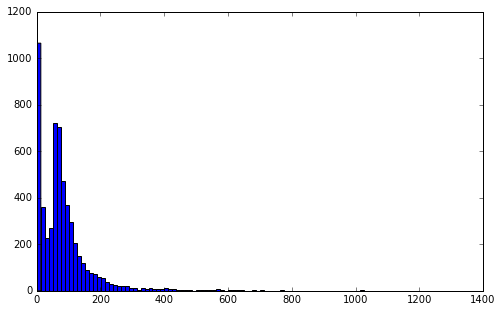

In [35]:
plt.hist(max_charge, bins=100)
plt.show()

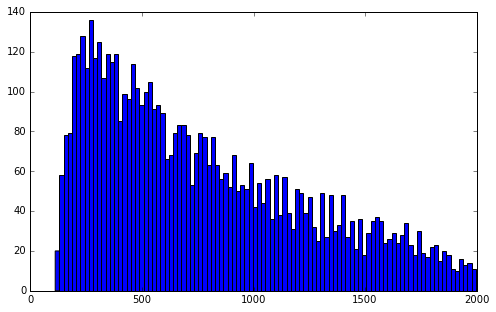

In [36]:
plt.hist(min_time, bins=100)
plt.show()

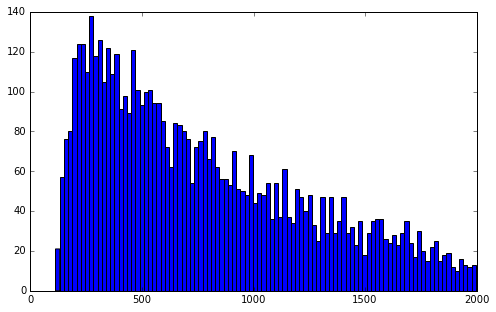

In [37]:
plt.hist(max_time, bins=100)
plt.show()

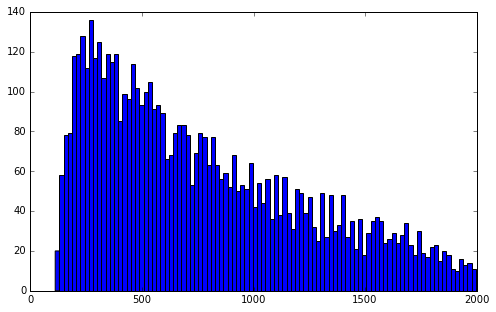

In [38]:
plt.hist(min_peak_time, bins=100)
plt.show()

In [67]:
reload(hits)
from hits import CTHHits

In [69]:
ice_cth = CTHHits(cth_sig_file, tree="CTHHitTree", branches=good_branches)

In [71]:
print ice_cth.get_signal_hits()

[ (1, 16, False, True, 1, 1, 0, 11, 418407500L, 418489310L, 0L, 66.24618530273438, -35.217750549316406, 73.47245788574219, -0.0, -0.0, -0.0, 6759.98046875, 9.187767028808594, 7601.298828125, 362.68194580078125, 7154.5458984375, -404.6995544433594, 7707.01220703125, 364.7732849121094, 7148.5830078125, -435.0625, 7710.941650390625, 18907136, 0, True, 2, 0, 0, 0.0, 16, 6.489363223314285, 364.8597869873047, True)
 (0, 17, False, False, 5, 1, 0, 11, 418407500L, 418489310L, 0L, -35.817466735839844, -71.79484558105469, 67.74701690673828, 0.0, -0.0, -0.0, 6109.951171875, -37.61268615722656, 7569.20361328125, 382.6572265625, 5955.64013671875, -411.0121154785156, 7619.43701171875, 384.1193542480469, 5949.3857421875, -441.1028594970703, 7605.47412109375, 2228224, 2, True, 3, 1, 1, 0.0, 17, 52.619449496269226, 384.20664978027344, False)
 (0, 16, False, False, 3, 1, 0, 11, 418407500L, 418489310L, 0L, -35.817466735839844, -71.79484558105469, 67.74701690673828, 0.0, -0.0, -0.0, 6109.951171875, -37.61